In [38]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
#from keras.models import Sequential
#from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [39]:
df = pd.read_csv("/Users/apple/Downloads/dataset_classified.csv")
df.head()

,SerNr,RecNum,Asthma,PrePost,TrialNum,Date,Accept,TrialTyp,TrialNo,FEV1,...,TestDescr.StorageOption,TestDescr.CRC,TestDescr.Memo,TestDescr.ReviewerName,TestDescr.ReviewDate,TestDescr.ExtendedData,TestDescr.Status,TestDescr.TVersion,TestDescr.Name,TestDescr.PatientID
0,62899,184,1,False,0,09-12-09 11:08,True,0,2,-0.8369,...,False,36594,NaN,NaN,01-01-00,NaN,NaN,0.0,SHANTA GATADE,15744.0
1,62899,193,0,False,0,9/17/09 15:38,True,0,2,-3.1875,...,False,26315,NaN,NaN,01-01-00,NaN,NaN,0.0,SANDEEP CHATRABANA,274599.0
2,62899,197,0,False,0,9/23/09 11:56,False,0,2,-3.3494,...,False,41916,NaN,NaN,01-01-00,NaN,NaN,0.0,MRRAMKUMAR,85982.0
3,62899,206,1,False,0,9/24/09 13:15,False,0,4,-0.5000,...,False,40026,NaN,NaN,01-01-00,NaN,NaN,0.0,KANCHAN VANARSE,13991.0
4,62899,214,1,False,0,10/26/09 12:37,True,0,5,-1.2000,...,False,3546,NaN,NaN,01-01-00,NaN,NaN,0.0,LATA BHONG,291075.0


In [85]:
df = df[['Asthma', 'FEV1', 'FEV6',\
    'FVC', 'PEF', 'FEF25', 'FEF50',\
    'FEF75', 'FEF2575', 'FEV3', 'FIVC','IVC', 'VC', 'PIF', 'FIF25',\
    'FIF50', 'FIF75', 'TestDescr.Age', 'TestDescr.Gender', 'TestDescr.Weight',\
    'TestDescr.Height', 'TestDescr.Ethnic', 'TestDescr.Smoker' ]]

In [41]:

df.loc[df['TestDescr.Gender'] == True, ['TestDescr.Gender']] = '1'
df.loc[df['TestDescr.Gender'] == False, ['TestDescr.Gender']] = '0'
df = df.drop(df[df['Asthma'] == 'YES'].index)
df['FEV1'] = df['FEV1'].abs()
df['FEV6'] = df['FEV6'].abs()
df['FVC'] = df['FVC'].abs()
df['PEF'] = df['PEF'].abs()
df['FEF25'] = df['FEF25'].abs()
df['FEF50'] = df['FEF50'].abs()
df['FEF75'] = df['FEF75'].abs()
df['FEF2575'] = df['FEF2575'].abs()
df['FEV3'] = df['FEV3'].abs()
df['FIVC'] = df['FIVC'].abs()
df['PIF'] = df['PIF'].abs()
df['FIF25'] = df['FIF25'].abs()
df['FIF50'] = df['FIF50'].abs()
df['FIF75'] = df['FIF75'].abs()
df['FEV1/FVC'] = df['FEV1'] / df['FVC']


In [19]:
df.head()

,Asthma,FEV1,FEV6,FVC,PEF,FEF25,FEF50,FEF75,FEF2575,FEV3,...,FIF25,FIF50,FIF75,TestDescr.Age,TestDescr.Gender,TestDescr.Weight,TestDescr.Height,TestDescr.Ethnic,TestDescr.Smoker,FEV1/FVC
0,1,0.8369,0.0,1.0506,2.7531,2.6031,1.1619,0.2556,0.7731,1.0181,...,1.6400,1.7369,1.3481,67,1,47,143,3,1,0.796592
1,0,3.1875,0.0,3.5231,9.2494,8.7706,5.5269,2.2812,4.8944,3.4987,...,6.4044,7.0212,5.6944,30,0,64,167,3,2,0.904743
2,0,3.3494,0.0,3.4919,11.9450,3.4806,9.8394,2.6012,6.0194,0.0000,...,6.0425,5.9856,6.2100,43,0,75,175,1,2,0.959191
3,1,0.5000,0.0,0.5000,1.3519,1.0581,1.3500,1.2300,1.2500,0.0000,...,0.0462,0.1419,0.2150,64,1,30,142,3,1,1.000000
4,1,1.2000,0.0,1.3681,3.4481,3.2456,2.4737,0.6512,1.6694,0.0000,...,3.5100,3.4331,2.4512,44,1,70,161,3,1,0.877129


In [42]:
y = df['Asthma']
X = df.drop(['Asthma'], axis = 1)

In [43]:
df['Asthma'].value_counts()

1    2769
0    2282
4    1078
5     857
3     695
2      50
Name: Asthma, dtype: int64

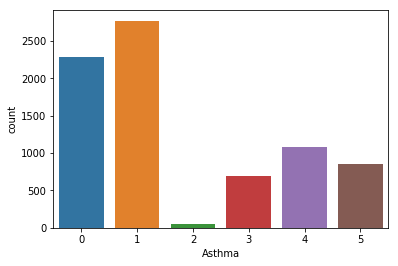

In [44]:
import seaborn as sns
sns.countplot(df['Asthma'], label = 'count')

In [45]:
#Training & Test Data split; Test data 20% 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [46]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(train_X, train_y) 
svm_predictions = svm_model_linear.predict(test_X) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(test_X, test_y) 
  
# creating a confusion matrix 
cm = confusion_matrix(test_y, svm_predictions)

print(accuracy)
print(cm)
print(f1_score(test_y, svm_predictions, average="macro", labels=np.unique(svm_predictions)))
print(precision_score(test_y, svm_predictions, average="macro", labels=np.unique(svm_predictions)))
print(recall_score(test_y, svm_predictions, average="macro", labels=np.unique(svm_predictions)))    


0.8901098901098901
[[401  56   0   7   1   0]
 [ 42 482   0   4   3   2]
 [  2   0   3   2   0   0]
 [  6   3   0 136  11   0]
 [  0  12   0   2 187   9]
 [  0   3   0   0   5 168]]
0.84835274973689
0.9164388516683807
0.8186781222973197


In [50]:
#20% unseen data Outcome Prediction for Asthama Sevirity 
svm_predictions = svm_model_linear.predict(test_X) 
print(svm_predictions)
print()
print(test_y)

['5' '1' '5' ... '5' '1' '2']

6721    5
1597    1
5120    5
1776    1
6285    5
860     1
6166    5
2131    0
247     1
6411    4
2580    0
2919    0
1462    0
1202    1
3925    0
5173    5
3519    1
7049    5
3819    1
1178    0
1130    1
7370    5
1026    1
5501    3
1251    0
5265    5
161     1
5347    5
5507    3
4396    1
       ..
4460    1
7061    4
1614    1
354     1
5276    5
4066    0
2440    0
4849    1
4343    0
5384    5
5240    4
4408    0
7023    4
7071    5
4966    0
4267    0
1053    1
211     1
3190    1
3940    0
1119    0
4988    0
2932    0
511     0
3271    0
7668    3
323     0
7358    5
338     1
6120    2
Name: Asthma, Length: 1547, dtype: object


In [91]:
GPUONCLOUD = pd.DataFrame({
        "Asthma": test_y,
        "Our Prediction": svm_predictions,
        "FEVI":test_X["FEV1"],
        "FEV6":test_X["FEV6"],
        "FVC":test_X["FVC"],
        "PEF":test_X["PEF"],
        "FEF25":test_X["FEF25"],
        "FEF50":test_X["FEF50"],
        "FEF75":test_X["FEF75"],
        "FEF2575":test_X["FEF2575"],
        "FEV3":test_X["FEV3"],
        "FIVC":test_X["FIVC"],
        "IVC":test_X["IVC"],
        "VC":test_X["VC"],
        "PIF":test_X["PIF"],
        "FIF25":test_X["FIF25"],
        "FIF50":test_X["FIF50"],
        "FIF75":test_X["FIF75"],
        "TestDescr.Age":test_X["TestDescr.Age"],
        "TestDescr.Gender":test_X["TestDescr.Gender"],
        "TestDescr.Weight":test_X["TestDescr.Weight"],
        "TestDescr.Height":test_X["TestDescr.Height"], 
        "TestDescr.Ethnic":test_X["TestDescr.Ethnic"],
        "TestDescr.Smoker":test_X["TestDescr.Smoker"]
        
        
    })

GPUONCLOUD.to_csv('output4.csv', index=False)

In [92]:
#Prediction Values from SVM "Asthama" column refers to the Original values in Classification Dataset(Training Dataset) 
#and "Our Prediction" Column is Machine Generated
#Note the misclassificaiton between the 2 columns
GPUONCLOUD = pd.read_csv('output4.csv')
print("Model Accuracy", accuracy)
GPUONCLOUD.tail()

Model Accuracy 0.8901098901098901


,Asthma,Our Prediction,FEVI,FEV6,FVC,PEF,FEF25,FEF50,FEF75,FEF2575,...,PIF,FIF25,FIF50,FIF75,TestDescr.Age,TestDescr.Gender,TestDescr.Weight,TestDescr.Height,TestDescr.Ethnic,TestDescr.Smoker
1542,3,4,1.517500,2.546875,2.590625,3.754375,1.896250,0.969375,0.361875,0.805000,...,3.125000,2.730625,2.994375,2.440000,30,1,56,157,3,1
1543,0,1,2.004375,0.000000,2.606250,3.539375,3.231875,2.054375,0.878125,1.737500,...,0.719375,0.393125,0.651250,0.689375,25,1,45,157,3,1
1544,5,5,0.413125,0.965000,1.095000,0.883125,0.336250,0.179375,0.083125,0.168750,...,0.810625,0.612500,0.670000,0.534375,49,1,56,147,3,1
1545,1,1,1.495625,0.000000,1.528125,2.753125,1.859375,2.644375,1.284375,2.065625,...,0.998125,0.637500,0.364375,0.973125,37,1,70,149,3,1
1546,2,2,2.773750,3.554375,5.946875,7.158125,4.120625,0.349375,0.096875,0.154375,...,0.000000,0.000000,0.000000,0.000000,40,0,54,158,3,1


In [93]:
dg = pd.read_csv("output4.csv")
dg.head()

,Asthma,Our Prediction,FEVI,FEV6,FVC,PEF,FEF25,FEF50,FEF75,FEF2575,...,PIF,FIF25,FIF50,FIF75,TestDescr.Age,TestDescr.Gender,TestDescr.Weight,TestDescr.Height,TestDescr.Ethnic,TestDescr.Smoker
0,5,5,0.615625,1.314375,1.476875,2.778125,0.519375,0.251250,0.114375,0.216250,...,2.425000,2.075625,2.40250,1.726250,66,0,45,160,3,1
1,1,1,1.873750,2.541250,2.598750,7.106250,3.841250,1.585625,0.460625,1.261250,...,3.700000,2.625000,3.51125,3.323750,52,0,61,167,1,1
2,5,5,1.086900,2.058100,2.070600,1.605000,1.180600,0.679400,0.328100,0.612500,...,2.500600,2.463700,2.24440,1.749400,50,0,45,178,3,1
3,1,1,1.156875,1.465000,1.475000,1.394375,1.090000,1.344375,0.625625,1.100625,...,1.726875,1.598125,1.68875,1.352500,42,1,45,163,3,1
4,5,5,0.667500,1.623125,1.628750,1.001250,0.645000,0.268125,0.227500,0.333750,...,1.562500,1.386250,1.29000,0.600625,55,0,45,161,1,1


In [94]:
dg.shape

(1547, 24)